Before you turn this notebook in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Ishan Ranjan"

_Understanding Deep Learning_

---

# Shallow Neural Networks

<a href="https://colab.research.google.com/github/DL4DS/sp2024_notebooks/blob/main/release/nbs03/03_Shallow_Networks.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


The purpose of this notebook is to gain some familiarity with shallow neural networks.  It explores using different numbers of inputs and outputs, hidden units and activation functions.

In [2]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

## Build a Shallow Neural Network

Let's first construct the shallow neural network with one input, three hidden units, and one output described in section 3.1 of the book.

In [3]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  # Write code to implement the ReLU and compute the activation at the 
  # hidden unit from the preactivation.
  # This should work on every element of the ndarray "preactivation" at once
  # One way to do this is with the ndarray "clip" function
  # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.clip.html

  activation = preactivation * (preactivation > 0)

  return activation

Let's test your ReLU.

In [4]:
# Test for correctness
preactivation = np.array([-1, -0.5, 0, 0.5, 1])
assert np.array_equal(ReLU(preactivation), np.array([0, 0, 0, 0.5, 1]))


Now we'll plot it for $ -5 \le x \le 5$.

<function matplotlib.pyplot.show(close=None, block=None)>

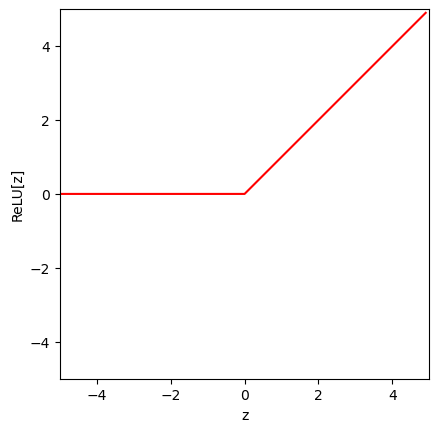

In [5]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU[z]')
ax.set_aspect('equal')
plt.show

In [6]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, 
                  phi_0,phi_1,phi_2,phi_3, 
                  theta_10, theta_11, 
                  theta_20, theta_21, 
                  theta_30, theta_31):
  
  # Note x is a scalar value.

  # Assign 3 variables, pre_1, pre_2, pre_3 to hold the preactivations, e.g.
  # the linear models based on x and theta values as in figure 3.3 a-c.

  # YOUR CODE HERE
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  # Pass these through the activation function to compute the activations as in 
  # figure 3.3 d-f

  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Now weight the activations using phi1, phi2 and phi3 to create the
  # weighted activations as in figure 3.3 g-i and add the offset to create 
  # the output as in figure 3.3j.

  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  y = w_act_1 + w_act_2 + w_act_3 + phi_0

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [7]:
# Assign parameter values and test the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.array([0.77])

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Assuming y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 are numpy arrays
expected_values = [[-0.8365], [-0.47], [0.54], [0.0005], [0.], [0.54], [0.0005], [0.], [-0.54], [0.0035]]

arrays_to_check = [y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3]

for array, expected in zip(arrays_to_check, expected_values):
    array_expected = np.array(expected)
    assert np.allclose(array, array_expected)


In [8]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3 
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $y$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
  plt.show()

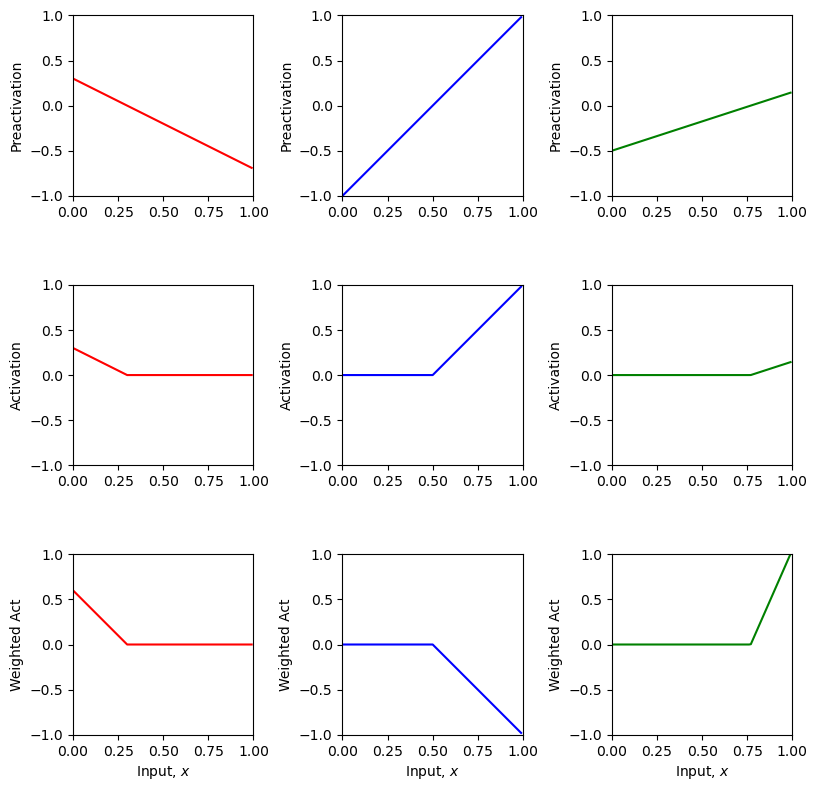

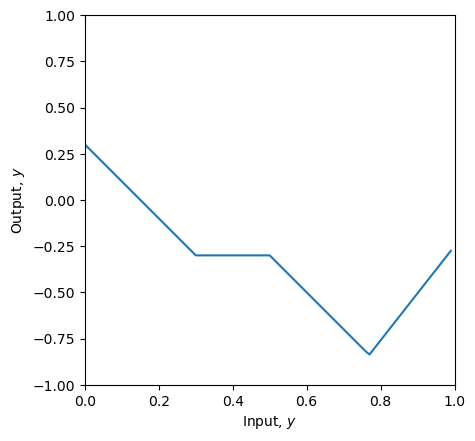

In [9]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

> **Note and question:** If look at the code in the previous cell, you see that `x` is a numpy array but we suggested
> you treat `x` as a scalar inside the function `shallow_1_1_3()`. What happened?
>
> **Answer:** This works because numpy uses a concept called broadcasting. If your function only had scalar operations
> and nominally one of the operations is a numpy array, then numpy will automatically repeat the scalar operation for 
> every element of the numpy array. This is a very handy feature and in fact is much more performant that implementing
> for-loops for large arrays. See [numpy broadcasting guide](https://numpy.org/doc/stable/user/basics.broadcasting.html)
> for more information.

Now let's play with the parameters to make sure we understand how they work.  The original  parameters were:

$\theta_{10} =  0.3$ ; $\theta_{20} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

The following cell is for you own understanding. It will not be graded. Nonetheless try the suggestions and see if
can predict correctly.

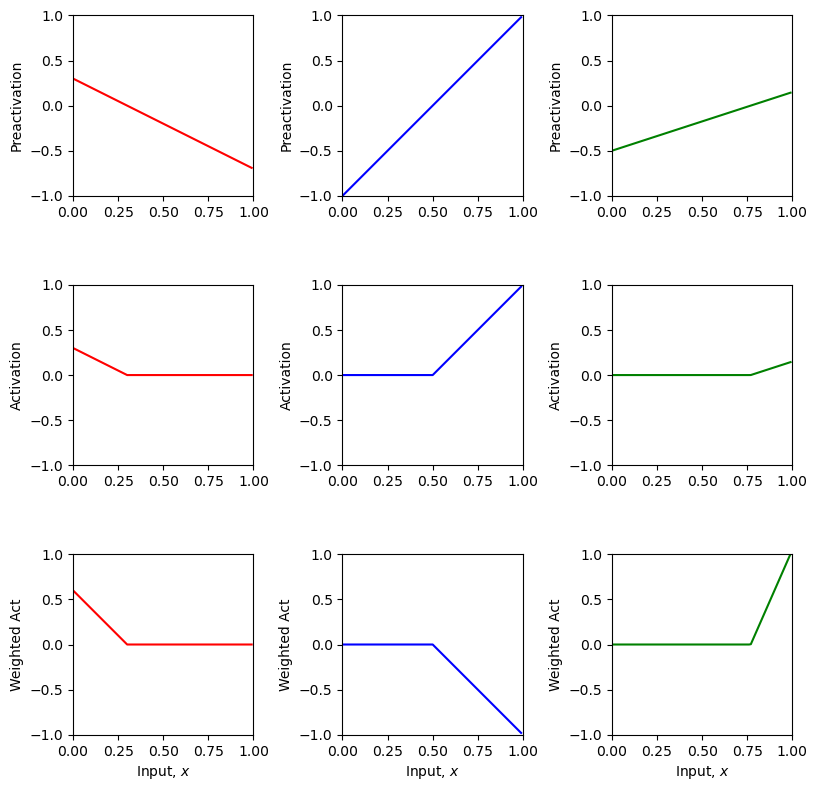

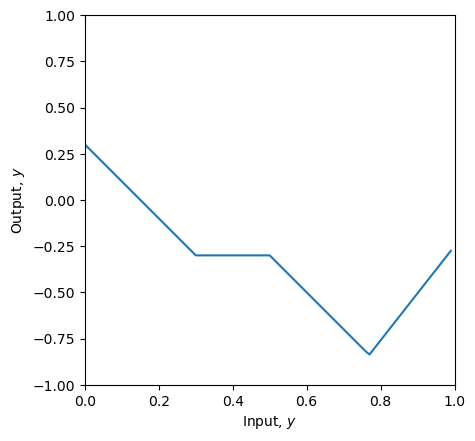

In [10]:
# TODO
# 1. Predict what effect changing phi_0 will have on the network.  
#   Answer:
# 2. Predict what effect multiplying phi_1, phi_2, phi_3 by 0.5 would have.  Check if you are correct
#   Answer:
# 3. Predict what effect multiplying phi_1 by -1 will have.  Check if you are correct.
#   Answer:
# 4. Predict what effect setting theta_20 to -1.2 will have.  Check if you are correct.
#   Answer:
# 5. Change the parameters so that there are only two "joints" (including outside the range of the plot) 
# There are actually three ways to do this. See if you can figure them all out
# Answer:
# 6. With the original parameters, the second line segment is flat (i.e. has slope zero)
# How could you change theta_10 so that all of the segments have non-zero slopes
# Answer:
# 7. What do you predict would happen if you multiply theta_20 and theta21 by 0.5, and phi_2 by 2.0?
# Check if you are correct.
# Answer:
# 8. What do you predict would happen if you multiply theta_20 and theta21 by -0.5, and phi_2 by -2.0?
# Check if you are correct.
# Answer:

theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

## Different activation functions

The ReLU isn't the only kind of activation function.  For a long time, people used sigmoid functions.  A logistic sigmoid function is defined by the equation

\begin{equation}
f[h] = \frac{1}{1+\exp{[-10 z ]}}
\end{equation}

(Note that the factor of 10 is not standard -- but it allows us to plot on the same axes as the ReLU examples)

In [ ]:
# Define the sigmoid function
def sigmoid(preactivation):
  # write code to implement the sigmoid function and compute the activation at the 
  # hidden unit from the 10*preactivation.  Use the np.exp() function.
  # Again, multiply preactivation by to in your calculation for this homework
  # just to make the plots align with the ReLU plots.

  # YOUR CODE HERE
  raise NotImplementedError()

  return activation

In [ ]:
# Let's test your sigmoid implementation
test_z = np.arange(-1, 1, 0.33)
test_sig_z = sigmoid(test_z)
test_sig_z_expected = np.array([4.53978687e-05, 1.22939862e-03, 3.22954647e-02, 4.75020813e-01, 9.60834277e-01, 9.98498818e-01, 9.99944551e-01])
assert np.allclose(test_sig_z, test_sig_z_expected)

Let's plot your modified sigmoid for $-1 \le x \le 1$.

In [ ]:
# Make an array of inputs
z = np.arange(-1,1,0.01)
sig_z = sigmoid(z)

# Plot the sigmoid function
fig, ax = plt.subplots()
ax.plot(z,sig_z,'r-')
ax.set_xlim([-1,1]);ax.set_ylim([0,1])
ax.set_xlabel('z'); ax.set_ylabel('sig[z]')
plt.show

Let's see what happens when we use this activation function in a neural network

In [ ]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, sigmoid, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

You probably notice that this gives nice smooth curves.  So why don't we use this?  Aha... it's not obvious right now, but we will get to it when we learn to fit models.

## Linear activation functions

However, neural networks don't work if the activation function is linear.  For example, consider what would happen if the activation function was: 

\begin{equation}
\mathrm{lin}[z] = a + bz
\end{equation}

In [ ]:
# Define the linear activation function
def lin(preactivation):
  a =0
  b =1

  # Compute linear function
  activation = a + b * preactivation
  
  # Return
  return activation

### Self-Study Questions

1. The linear activation function above just returns the input: (0+1*z) = z.
    1. Before running the code below,  make a prediction about what the ten panels of
       the drawing will look like. 
    2. Now run the code below to see if you were right. What family of functions can this represent?  
 
2. What happens if you change the parameters (a,b) in `lin()` to different values?  
   Try a=0.5, b=-0.4.  Don't forget to run the cell again to update the function.

In [ ]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, lin, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

Hopefully it is clear why using a nonlinear activation function is so important!

## Least squares loss

Now let's consider fitting the network to data.  First we need to define the loss function.  We'll use the least squares loss:

\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}(y_{i}-\mathrm{f}[x_{i},\boldsymbol\phi])^2
\end{equation}

where $(x_i,y_i)$ is an input/output training pair and $\mathrm{f}[\bullet,\boldsymbol\phi]$ is the neural network with parameters $\boldsymbol\phi$.  

In [ ]:
# Least squares function
def least_squares_loss(y_train, y_predict):
  # Compute the sum of squared
  # differences between the real and predicted values of y
  # you will need to use the function np.sum

  # YOUR CODE HERE
  raise NotImplementedError()

  return loss

In [ ]:
# Test your function with dummy data

y_train = np.array([0.47054415, 0.13747013, 0.71269093, 0.01539034, 0.63096982, 0.98647489,
                    0.12939223, 0.16237443, 0.37540949, 0.89636868])
y_predict = np.array([0.68049052, 0.12401763, 0.5127831,  0.20070157, 0.37388425, 0.151199,
                         0.76840562, 0.24458121, 0.60318515, 0.26141021])

loss = least_squares_loss(y_train, y_predict)
assert np.isclose(loss, 1.752490)


### Manually Train a Shallow Network

Now we're going to define a toy dataset and manually train a shallow network with
1 input, 3 hidden units and 1 output.

In [ ]:
# Manually define our training data
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

In the cell below, we do the following:
1. Assign initial parameters to the $\phi$'s and $\theta$'s, which you will
   subsequently change.
2. Plot your model with the parameters you assigned.
3. Execute your model on the training data inputs to infer output predictions.
4. Calculate the squared loss between your model predictions and the training
   data outputs.

The **homework exercise** is try to get the loss below 0.2.

In [ ]:
################################
# 1. Define parameters values
################################

# thetas of the linear models
theta_10 =  0.3 ; theta_11 = -1.0   # y-intercept and slope of first linear unit
theta_20 = -1.0  ; theta_21 = 2.0   # y-intercept and slope of second linear unit
theta_30 = -0.5  ; theta_31 = 0.65  # y-intercept and slope of third linear unit

# y-intercept and weights for each of the 3 hidden units
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

################################
# 2. Plot your model
################################

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True, x_data = x_train, y_data = y_train)

#########################################################################
# 3. Run the neural network on the training data and calculate the loss
#########################################################################

y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print("Loss = %3.3f"%(loss))

# TODO.  Manipulate the parameters (by hand!) to make the function 
# fit the data better and try to reduce the loss to be less than 0.2
# Tip... start by manipulating phi_0.

In [ ]:
# Test your model loss

assert loss < 0.2,  "Try to reduce the loss to be less than 0.2"

## Networks with two inputs

Now we'll build a neural network that takes two inputs similar to figure 3.8.  

In [ ]:
# Code to draw 2D function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(ax, x1_mesh, x2_mesh, y, draw_heatmap=False):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    if draw_heatmap:
      fig.colorbar(pos, ax=ax)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')

# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3 
def plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    draw_2D_function(ax[0,0], x1,x2,pre_1); ax[0,0].set_title('Preactivation')
    draw_2D_function(ax[0,1], x1,x2,pre_2); ax[0,1].set_title('Preactivation')
    draw_2D_function(ax[0,2], x1,x2,pre_3); ax[0,2].set_title('Preactivation')
    draw_2D_function(ax[1,0], x1,x2,act_1); ax[1,0].set_title('Activation')
    draw_2D_function(ax[1,1], x1,x2,act_2); ax[1,1].set_title('Activation')
    draw_2D_function(ax[1,2], x1,x2,act_3); ax[1,2].set_title('Activation')
    draw_2D_function(ax[2,0], x1,x2,w_act_1); ax[2,0].set_title('Weighted Act')
    draw_2D_function(ax[2,1], x1,x2,w_act_2); ax[2,1].set_title('Weighted Act')
    draw_2D_function(ax[2,2], x1,x2,w_act_3); ax[2,2].set_title('Weighted Act')
    plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y,draw_heatmap=True)
  ax.set_title('Network ouptut, $y$')
  ax.set_aspect(1.0)
  plt.show()

In [ ]:
# Define a shallow neural network with, two inputs, one output, and three hidden units
def shallow_2_1_3(x1,x2, activation_fn, 
                  phi_0,phi_1,phi_2,phi_3, 
                  theta_10, theta_11, theta_12, 
                  theta_20, theta_21, theta_22, 
                  theta_30, theta_31, theta_32):
  
  # Compute pre_1, pre_2 and pre_3 from three linear
  # functions (figure 3.8a-c) with the theta parameters.  
  # These are the preactivations

  # YOUR CODE HERE
  raise NotImplementedError()

  # Pass these through the activation_fn to compute the activations as in 
  # figure 3.8 d-f.

  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  # Writ the code below to weight the activations (a.k.a. hidden units) using
  # phi1, phi2 and phi3 and assign them to w_act_1, w_act_2 and w_act_3
  # to create the equivalent of figure 3.8 g-i

  # YOUR CODE HERE
  raise NotImplementedError()
  
  # Write the code below to combine the weighted activations and add 
  # phi_0 and assign it to y to create the output as in figure 3.8j

  # YOUR CODE HERE
  raise NotImplementedError()
  
  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [ ]:
# Now lets define some parameters
theta_10 =  4.0 ;  theta_11 = -0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -5  ; theta_31 = 0.5; theta_32 = 0.9

phi_0 = 0.0; phi_1 = -1.0; phi_2 = 2.0; phi_3 = 0.6


In [ ]:
# Let's test that your model is producing correct results

x1 = np.array([0.77])
x2 = np.array([0.33])

y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)

expected_values = [[4.977], [3.307], [4.142], [-4.318], [3.307], [4.142], [0.], [-3.307], [8.284], [0.]]
arrays_to_check = [y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3]

for array, expected in zip(arrays_to_check, expected_values):
    array_expected = np.array(expected)
    assert np.allclose(array, array_expected)


In [ ]:

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_2_1_3(x1,x2, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_12, theta_20, theta_21, theta_22, theta_30, theta_31, theta_32)
# And then plot it
plot_neural_2_inputs(x1,x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

